<a href="https://colab.research.google.com/github/TWilletts/Machine_Learning_Projects/blob/main/VR_Deep_Learning_Family_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import Callback
from tensorflow.keras import layers
import os
import glob
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dropout, Dense
from sklearn.model_selection import train_test_split

In [2]:
# the path to your csv file directory
mycsvdir = r"/content"

# get all the csv files in that directory (assuming they have the extension .csv)
csvfiles = glob.glob(os.path.join(mycsvdir, '*.csv'))

# loop through the files and read them in with pandas
data_0 = pd.read_csv(csvfiles[0])
data_1 = pd.read_csv(csvfiles[1])
data_2 = pd.read_csv(csvfiles[2])
data_3 = pd.read_csv(csvfiles[3])
data_4 = pd.read_csv(csvfiles[4])
data_5 = pd.read_csv(csvfiles[5])
data_6 = pd.read_csv(csvfiles[6])
data_7 = pd.read_csv(csvfiles[7])
csvfiles


['/content/7483655.csv',
 '/content/9330209.csv',
 '/content/2714588.csv',
 '/content/74208.csv',
 '/content/1116550.csv',
 '/content/5656221.csv',
 '/content/5868825.csv',
 '/content/2819504.csv']

In [3]:
francis_list = []
willetts_list = []

francis_list.append(data_4)
francis_list.append(data_0)
francis_list.append(data_3)
francis_list.append(data_5)
willetts_list.append(data_1)
willetts_list.append(data_2)
willetts_list.append(data_6)
willetts_list.append(data_7)

In [4]:
#data_list = []
#data_list.append(data_0)
#data_list.append(data_1)
#data_list.append(data_2)
#data_list.append(data_3)
#data_list.append(data_4)
#data_list.append(data_5)
#data_list.append(data_6)
#data_list.append(data_7)
#data_list

In [5]:
length_val = 4
#for i in data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7:
for i in range(length_val):
    francis_list[i]['Family'] = 0
for i in range(length_val):
    willetts_list[i]['Family'] = 1
print(francis_list[3])

      isClockwise     LeftX     LeftY  ...    MainRZ    MainRW  Family
0               1 -0.712338  1.810808  ... -0.048716  0.986993       0
1               1 -0.712187  1.810766  ... -0.048109  0.987179       0
2               1 -0.712004  1.810729  ... -0.047842  0.987341       0
3               1 -0.711762  1.810658  ... -0.047835  0.987389       0
4               1 -0.711513  1.810567  ... -0.047759  0.987447       0
...           ...       ...       ...  ...       ...       ...     ...
5995            0 -0.200800  1.856674  ...  0.127586  0.985828       0
5996            0 -0.202871  1.887827  ...  0.125458  0.986069       0
5997            0 -0.206768  1.918116  ...  0.124451  0.986291       0
5998            0 -0.212346  1.948113  ...  0.121451  0.986838       0
5999            0 -0.219528  1.977300  ...  0.119370  0.987284       0

[6000 rows x 23 columns]


In [6]:
training_array_train = []
answer_array_train = []

for i in francis_list[0], francis_list[1], francis_list[3], willetts_list[0], willetts_list[1], willetts_list[3]:
    clockwise_0, clockwise_1 = [x for _,x in i.groupby('isClockwise')]
    clockwise_0_cat = clockwise_0.copy()
    clockwise_0_cat.drop(['Family'], axis='columns', inplace=True)

    clockwise_1_cat = clockwise_1.copy()
    clockwise_1_cat.drop(['Family'], axis='columns', inplace=True)

    clockwise_0 = clockwise_0.to_numpy()
    clockwise_1 = clockwise_1.to_numpy()
    clockwise_0_cat = clockwise_0_cat.to_numpy()
    clockwise_1_cat = clockwise_1_cat.to_numpy()

    clockwise_0_cat/=np.abs(clockwise_0_cat).max()
    clockwise_1_cat/=np.abs(clockwise_1_cat).max()
    
    training_clockwise = []
    answer_clockwise = []
    amount_to_combine = 100

    for i in range (len(clockwise_0)-(amount_to_combine-1)):
        training_clockwise.append(clockwise_0_cat[i:i+amount_to_combine])
        answer_clockwise.append(clockwise_0[i][-1])


    for i in range (len(clockwise_1)-(amount_to_combine-1)):
        training_clockwise.append(clockwise_1_cat[i:i+amount_to_combine])
        answer_clockwise.append(clockwise_1[i][-1])
            
    training_array_train.append(training_clockwise)
    answer_array_train.append(answer_clockwise)

len(training_array_train[0])

5802

In [7]:
training_array_test = []
answer_array_test = []

for i in francis_list[2], willetts_list[2]:
    clockwise_0, clockwise_1 = [x for _,x in i.groupby('isClockwise')]
    clockwise_0_cat = clockwise_0.copy()
    clockwise_0_cat.drop(['Family'], axis='columns', inplace=True)

    clockwise_1_cat = clockwise_1.copy()
    clockwise_1_cat.drop(['Family'], axis='columns', inplace=True)

    clockwise_0 = clockwise_0.to_numpy()
    clockwise_1 = clockwise_1.to_numpy()
    clockwise_0_cat = clockwise_0_cat.to_numpy()
    clockwise_1_cat = clockwise_1_cat.to_numpy()

    clockwise_0_cat/=np.abs(clockwise_0_cat).max()
    clockwise_1_cat/=np.abs(clockwise_1_cat).max()
    
    training_clockwise = []
    answer_clockwise = []
    amount_to_combine = 100

    for i in range (len(clockwise_0)-(amount_to_combine-1)):
        training_clockwise.append(clockwise_0_cat[i:i+amount_to_combine])
        answer_clockwise.append(clockwise_0[i][-1])


    for i in range (len(clockwise_1)-(amount_to_combine-1)):
        training_clockwise.append(clockwise_1_cat[i:i+amount_to_combine])
        answer_clockwise.append(clockwise_1[i][-1])
            
    training_array_test.append(training_clockwise)
    answer_array_test.append(answer_clockwise)

len(training_array_train[0])

5802

In [8]:
training_array_train = np.array(training_array_train)
answer_array_train = np.array(answer_array_train)

training_array_test = np.array(training_array_test)
answer_array_test = np.array(answer_array_test)

In [9]:
Y_train = []
for i in range(len(answer_array_train)):
    class_list = []
    classifier = answer_array_train[i]
    print(i)
    Y_train.append(answer_array_train[i])
Y_train = np.concatenate(Y_train,axis=0)
Y_train.astype(int)

Y_test = []
for i in range(len(answer_array_test)):
    class_list = []
    classifier = answer_array_test[i]
    print(i)
    Y_test.append(answer_array_test[i])
Y_test = np.concatenate(Y_test,axis=0)
Y_test.astype(int)

0
1
2
3
4
5
0
1


array([0, 0, 0, ..., 1, 1, 1])

In [12]:
X_train = []
for i in range(len(training_array_train)):
    movement = training_array_train[i]
    X_train.append(movement)
X_train = np.concatenate(X_train,axis=0)
X_train.shape

X_test = []
for i in range(len(training_array_test)):
    movement = training_array_test[i]
    X_test.append(movement)
X_test = np.concatenate(X_test,axis=0)
X_test.shape

(11604, 100, 22)

In [13]:
X = np.concatenate((X_train,X_test), axis=0)
Y = np.concatenate((Y_train,Y_test), axis=0)
X.shape
validation_split = X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

Epoch 1/10
349/349 - 33s - loss: 16.0468 - accuracy: 0.5186 - val_loss: 0.7522 - val_accuracy: 0.5000
Epoch 2/10
349/349 - 21s - loss: 0.6976 - accuracy: 0.5100 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 3/10
349/349 - 21s - loss: 0.6918 - accuracy: 0.5224 - val_loss: 0.6971 - val_accuracy: 0.2676
Epoch 4/10
349/349 - 22s - loss: 0.6934 - accuracy: 0.5331 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 5/10
349/349 - 22s - loss: 0.7522 - accuracy: 0.5305 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 6/10
349/349 - 23s - loss: 0.6765 - accuracy: 0.5602 - val_loss: 0.8118 - val_accuracy: 0.4747
Epoch 7/10
349/349 - 23s - loss: 0.2135 - accuracy: 0.9022 - val_loss: 1.0175 - val_accuracy: 0.7335
Epoch 8/10
349/349 - 23s - loss: 0.0284 - accuracy: 0.9903 - val_loss: 1.2124 - val_accuracy: 0.8129
Epoch 9/10
349/349 - 23s - loss: 0.0083 - accuracy: 0.9970 - val_loss: 1.9035 - val_accuracy: 0.7907
Epoch 10/10
349/349 - 22s - loss: 2.6969 - accuracy: 0.7390 - val_loss: 0.6936 - val_accur

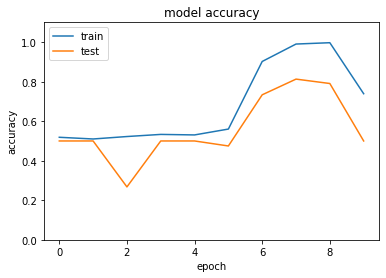

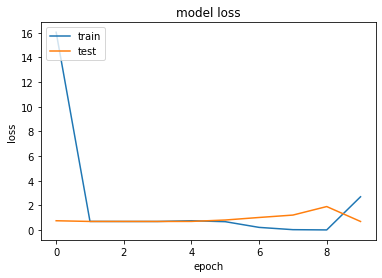

In [15]:
#with tf.device("GPU:0"):
model = keras.Sequential()
model.add(keras.layers.Conv1D(32, kernel_size = 5, activation = 'relu', input_shape=(100,22)))
model.add(keras.layers.LSTM(32, return_sequences=True)),
model.add(keras.layers.LSTM(128, return_sequences=True)),
model.add(keras.layers.LSTM(256, return_sequences=True)),
model.add(keras.layers.LSTM(512, return_sequences=True)),
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32)),
#model.add(keras.layers.Dropout(0.2)),
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# print(model)
# Fit the model
history = model.fit(X, Y, validation_split=validation_split, epochs=10, batch_size=100, verbose=2)
# list all data in history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,1.1)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [16]:
model = keras.Sequential()
model.add(keras.layers.Conv1D(32, kernel_size = 5, activation = 'relu', input_shape=(100,22)))
model.add(keras.layers.LSTM(32, return_sequences=True)),
model.add(keras.layers.LSTM(128, return_sequences=True)),
model.add(keras.layers.LSTM(256, return_sequences=True)),
model.add(keras.layers.LSTM(512, return_sequences=True)),
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32)),
#model.add(keras.layers.Dropout(0.2)),
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# print(model)
# Fit the model
history = model.fit(X, Y, validation_split=validation_split, epochs=5, batch_size=100, verbose=2)

Epoch 1/5
349/349 - 28s - loss: 3.1858 - accuracy: 0.5292 - val_loss: 0.8082 - val_accuracy: 0.4863
Epoch 2/5
349/349 - 23s - loss: 0.4537 - accuracy: 0.7739 - val_loss: 4.8902 - val_accuracy: 0.4988
Epoch 3/5
349/349 - 23s - loss: 0.0978 - accuracy: 0.9602 - val_loss: 4.2488 - val_accuracy: 0.5565
Epoch 4/5
349/349 - 23s - loss: 0.0245 - accuracy: 0.9914 - val_loss: 1.7510 - val_accuracy: 0.7644
Epoch 5/5
349/349 - 23s - loss: 0.1051 - accuracy: 0.9718 - val_loss: 3.3190 - val_accuracy: 0.6179


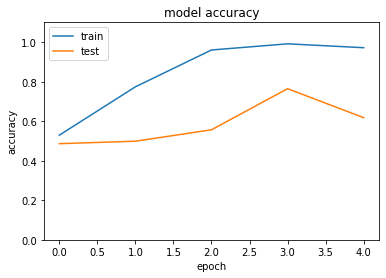

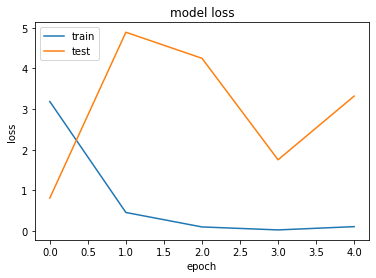

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,1.1)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#model.predict(X)
model.evaluate(X_test, Y_test, verbose = 2)

436/436 - 5s - loss: 0.8271 - accuracy: 0.9031


[0.8270520567893982, 0.9030520915985107]

In [19]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186
    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

Epoch 1/5
3110/3110 - 92s - loss: 121692.5469 - accuracy: 0.5042 - val_loss: 357064.4062 - val_accuracy: 0.3788
Epoch 2/5
3110/3110 - 86s - loss: 863661.0625 - accuracy: 0.5056 - val_loss: 78989.9609 - val_accuracy: 0.3788
Epoch 3/5
3110/3110 - 86s - loss: 2550038.7500 - accuracy: 0.5034 - val_loss: 18448.7930 - val_accuracy: 0.6212
Epoch 4/5
3110/3110 - 85s - loss: 5297991.5000 - accuracy: 0.5087 - val_loss: 3858936.5000 - val_accuracy: 0.6212
Epoch 5/5
3110/3110 - 85s - loss: 4964929.5000 - accuracy: 0.5054 - val_loss: 9281687.0000 - val_accuracy: 0.6212


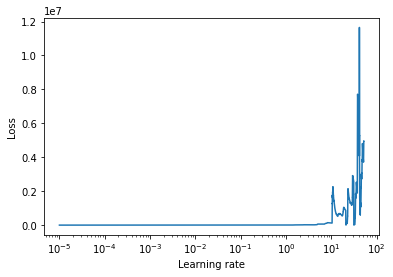

In [20]:
#with tf.device("GPU:0"):
model = keras.Sequential()
model.add(keras.layers.Conv1D(32, kernel_size = 5, activation = 'relu', input_shape=(100,22)))
model.add(keras.layers.LSTM(32, return_sequences=True)),
model.add(keras.layers.LSTM(128, return_sequences=True)),
model.add(keras.layers.LSTM(256, return_sequences=True)),
model.add(keras.layers.LSTM(512, return_sequences=True)),
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32)),
#model.add(keras.layers.Dropout(0.2)),
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Compile model
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_size = 1
batch_size = 1
lr_finder = LRFinder(min_lr=1e-5, 
                    max_lr=1e-2, 
                    steps_per_epoch=np.ceil(epoch_size/batch_size), 
                    epochs=3)
model.fit(X, Y, validation_split=0.33, epochs=5, batch_size=10, verbose=2, callbacks=[lr_finder])
            
lr_finder.plot_loss()